## Import Library dan Mengubah Parameter Matpotlib

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# B. PREPROCESSING DATA

## 1. IMPORT LIBRARY & DATASET

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('train.csv', sep= ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 2. HANDLING OUTLIERS

##### Berdasarkan hasil EDA pada Univariate Analysis didapatkan bahwa terdapat banyak data outliers yang perlu dilakukan handling pada setiap features yang ada, yaitu seperti pada feature balance, age, campaign, duration, pdays.

##### Handling Outliers dapat dilakukan melalui 2 cara yaitu :<br>a. IQR<br>b. Z-Score

Pada Stage 2 ini dalam melakukan handling outliers menggunakan Metode Z-Score, dengan didapatkan hasil sebagai berikut :

In [46]:
from scipy import stats

In [47]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in [
        'age',
        'balance',
        'day',
        'duration',
        'campaign',
        'pdays',
        'previous',
    ]:
    z_scores = abs(stats.zscore(df[col]))
    filtered_entries = (z_scores <3) & filtered_entries

df_zscores = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscores)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 40209


In [48]:
df_zscores.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9361,51,self-employed,married,primary,no,10,no,no,unknown,6,jun,513,3,-1,0,unknown,no
860,33,retired,married,secondary,no,165,no,no,unknown,7,may,111,1,-1,0,unknown,no
39852,34,management,married,tertiary,no,611,no,no,cellular,2,jun,350,1,-1,0,unknown,yes
5554,35,admin.,single,secondary,no,91,yes,no,unknown,23,may,185,4,-1,0,unknown,no
8194,48,admin.,married,secondary,no,749,yes,no,unknown,2,jun,56,3,-1,0,unknown,no
38228,34,housemaid,divorced,secondary,no,787,yes,no,cellular,15,may,665,1,-1,0,unknown,no
5180,38,blue-collar,single,primary,no,-5,yes,no,unknown,21,may,30,12,-1,0,unknown,no
33582,55,admin.,married,secondary,no,499,yes,yes,cellular,20,apr,124,4,150,1,other,no
40933,30,technician,married,secondary,no,6843,no,no,cellular,12,aug,227,1,-1,0,unknown,no
42395,29,technician,single,secondary,no,1165,no,no,cellular,3,dec,244,2,184,1,success,yes


##### Berdasarkan hasil handling outliers menggunakan metode di atas didapatkan bahwa :
##### Z-Score : menyisakan data sebesar 40.209 rows dari data awal 45.211 rows


## 3. FEATURES TRANSFORMATION

### a. Unknown Value.

Nilai unknown value menyebabkan dataset yang dimiliki menjadi bias karena value tersebut tidak mewakili scope category yang ada pada suatu features. Sehingga dapat dipertimbangkan bahwa unkown value tersebut dapat di-drop sehingga dapat menyisihkan dataset yang bersih.

In [49]:
# Melakukan drop pada column Job
df_job = df_zscores[(df_zscores['job']!= 'unknown')]
df_job

# Melakukan drop pada column Education
df_edu = df_job[(df_job['education']!= 'unknown')]
df_edu

# Melakukan drop pada column Contact
df_con = df_edu[(df_edu['contact']!= 'unknown')]
df_con

# Melakukan drop pada column poutcome
df_final = df_con[(df_con['poutcome']!= 'unknown')]
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes


In [50]:
# Melakukan check unknown value yang sudah di drop pada features
for col in [
        'job',
        'education',
        'contact',
        'poutcome',
    ]:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df_final[col].value_counts(), '\n')

job 
--------------------
management       1305
technician        942
blue-collar       938
admin.            716
services          460
retired           272
self-employed     194
student           177
entrepreneur      157
unemployed        155
housemaid         111
Name: job, dtype: int64 

education 
--------------------
secondary    2835
tertiary     1986
primary       606
Name: education, dtype: int64 

contact 
--------------------
cellular     5092
telephone     335
Name: contact, dtype: int64 

poutcome 
--------------------
failure    3202
success    1119
other      1106
Name: poutcome, dtype: int64 



In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5427 entries, 24060 to 45201
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5427 non-null   int64 
 1   job        5427 non-null   object
 2   marital    5427 non-null   object
 3   education  5427 non-null   object
 4   default    5427 non-null   object
 5   balance    5427 non-null   int64 
 6   housing    5427 non-null   object
 7   loan       5427 non-null   object
 8   contact    5427 non-null   object
 9   day        5427 non-null   int64 
 10  month      5427 non-null   object
 11  duration   5427 non-null   int64 
 12  campaign   5427 non-null   int64 
 13  pdays      5427 non-null   int64 
 14  previous   5427 non-null   int64 
 15  poutcome   5427 non-null   object
 16  y          5427 non-null   object
dtypes: int64(7), object(10)
memory usage: 763.2+ KB


### c. Melakukan Normalisasi dan Standarisasi

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
# Normalisasi
df_final['balance_norm'] = MinMaxScaler().fit_transform(df_final['balance'].values.reshape(len(df_final), 1))
df_final['duration_norm'] = MinMaxScaler().fit_transform(df_final['duration'].values.reshape(len(df_final), 1))
df_final['campaign_norm'] = MinMaxScaler().fit_transform(df_final['campaign'].values.reshape(len(df_final), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [54]:
df_final[['balance_norm','duration_norm','campaign_norm']].describe()

,balance_norm,duration_norm,campaign_norm
count,5427.000000,5427.000000,5427.000000
mean,0.264229,0.231746,0.086839
std,0.150809,0.177978,0.130564
min,0.000000,0.000000,0.000000
25%,0.169162,0.105366,0.000000
50%,0.205452,0.181463,0.000000
75%,0.299430,0.303415,0.090909
max,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

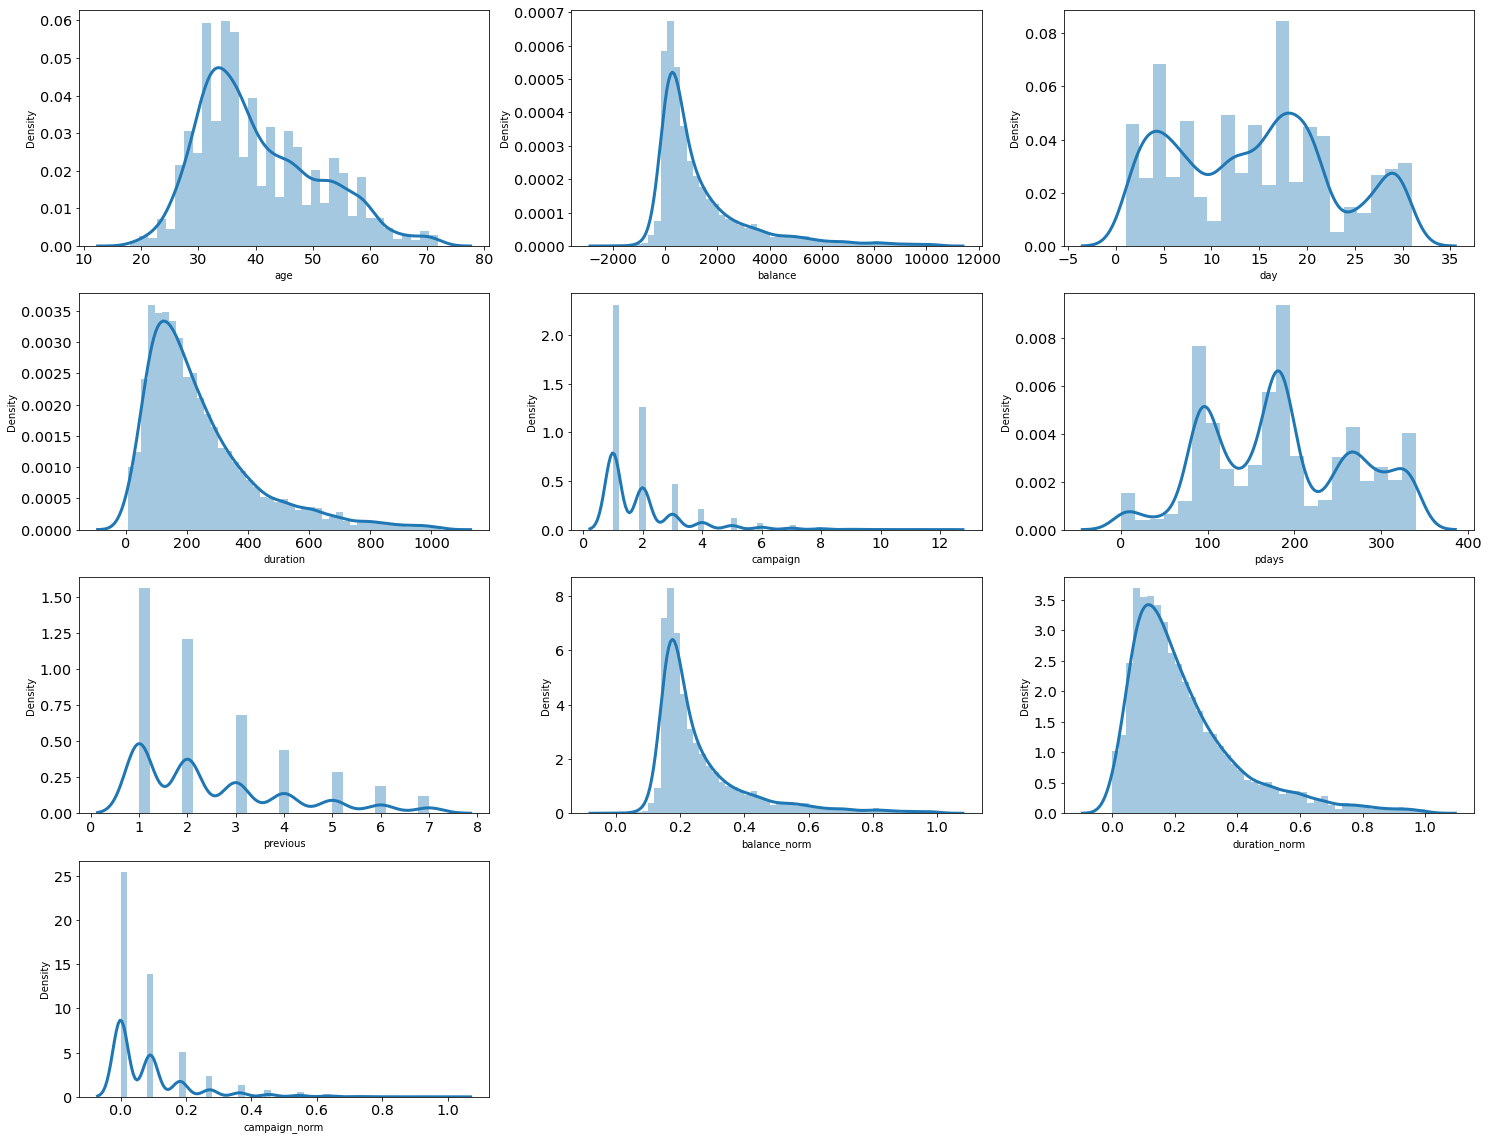

In [55]:
plt.figure(figsize=(25,20))
for i in enumerate(df_final.describe().columns):
  plt.subplot(4,3,i[0]+1)
  sns.distplot(df_final[i[1]])
plt.show()

## 4. FEATURE ENCODING

In [56]:
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_norm,duration_norm,campaign_norm
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,0.225061,0.033171,0.000000
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes,0.133198,0.501463,0.000000
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,0.433523,0.135610,0.000000
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,0.349797,0.066341,0.000000
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,0.153295,0.131707,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes,0.164361,0.196098,0.000000
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes,0.166233,0.433171,0.090909
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no,0.164524,0.153171,0.090909
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes,0.246542,0.201951,0.000000


In [57]:
# Melakukan Label Encoding

mapping_edu = {
    'primary': 0,  
    'secondary': 1,
    'tertiary': 2,  
}
df_final['education'] = df_final['education'].map(mapping_edu)

mapping_default = {
    'no': 0,
    'yes': 1   
}
df_final['default'] = df_final['default'].map(mapping_default)

mapping_house = {
    'no': 0,
    'yes': 1    
}
df_final['housing'] = df_final['housing'].map(mapping_house)

mapping_loan = {
    'no': 0,
    'yes': 1
}
df_final['loan'] = df_final['loan'].map(mapping_loan)

mapping_poutcome = {
    'failure' : 0, 
    'other': 1,
    'success': 2
}
df_final['poutcome'] = df_final['poutcome'].map(mapping_poutcome)

mapping_y = {
    'no': 0,
    'yes': 1
}
df_final['y'] = df_final['y'].map(mapping_y)


mapping_job = {
    'unemployed': 0,
    'retired': 1,
    'student': 2,
    'housemaid': 3,
    'self-employed': 4,
    'services': 5,
    'admin.': 6,
    'technician': 7,
    'entrepreneur': 8,
    'blue-collar': 9,
    'management': 10,
}
df_final['job'] = df_final['job'].map(mapping_job)

# Melakukan OneHot Encoding
df_new = pd.get_dummies(df_final,columns=['marital', 'contact'])
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,age,job,education,default,balance,housing,loan,day,month,duration,...,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
24060,33,6,2,0,882,0,0,21,oct,39,...,0,0,0.225061,0.033171,0.000000,0,1,0,0,1
24062,42,6,1,0,-247,1,1,21,oct,519,...,1,1,0.133198,0.501463,0.000000,0,0,1,0,1
24064,33,5,1,0,3444,1,0,21,oct,144,...,0,1,0.433523,0.135610,0.000000,0,1,0,0,1
24072,36,10,2,0,2415,1,0,22,oct,73,...,1,0,0.349797,0.066341,0.000000,0,1,0,0,1
24077,36,10,2,0,0,1,0,23,oct,140,...,0,1,0.153295,0.131707,0.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,9,1,0,136,0,0,16,nov,206,...,2,1,0.164361,0.196098,0.000000,0,1,0,1,0
45193,28,4,2,0,159,0,0,16,nov,449,...,2,1,0.166233,0.433171,0.090909,0,0,1,1,0
45194,59,10,2,0,138,1,1,16,nov,162,...,0,0,0.164524,0.153171,0.090909,0,1,0,1,0
45195,68,1,1,0,1146,0,0,16,nov,212,...,2,1,0.246542,0.201951,0.000000,0,1,0,1,0


### Melakukan drop features hasil Normalisasi dan Onehot Encoding

In [58]:
df_new = df_new.drop(['balance', 'duration', 'campaign', 'pdays', 'day', 'month'], axis=1)
df_new

,age,job,education,default,housing,loan,previous,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
24060,33,6,2,0,0,0,3,0,0,0.225061,0.033171,0.000000,0,1,0,0,1
24062,42,6,1,0,1,1,1,1,1,0.133198,0.501463,0.000000,0,0,1,0,1
24064,33,5,1,0,1,0,4,0,1,0.433523,0.135610,0.000000,0,1,0,0,1
24072,36,10,2,0,1,0,4,1,0,0.349797,0.066341,0.000000,0,1,0,0,1
24077,36,10,2,0,1,0,3,0,1,0.153295,0.131707,0.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,9,1,0,0,0,3,2,1,0.164361,0.196098,0.000000,0,1,0,1,0
45193,28,4,2,0,0,0,4,2,1,0.166233,0.433171,0.090909,0,0,1,1,0
45194,59,10,2,0,1,1,5,0,0,0.164524,0.153171,0.090909,0,1,0,1,0
45195,68,1,1,0,0,0,6,2,1,0.246542,0.201951,0.000000,0,1,0,1,0


In [59]:
df_new.corr() # Melihat bagaimana korelasi pada features berkategori numerical

,age,job,education,default,housing,loan,previous,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
age,1.000000,-0.160051,-0.168218,-0.018741,-0.113924,0.036033,0.041630,0.001720,0.014361,0.084128,0.029678,0.020851,0.163130,0.322356,-0.453911,-0.103103,0.103103
job,-0.160051,1.000000,0.225319,0.015574,0.202033,0.043705,0.006849,-0.089519,-0.101795,-0.014730,-0.054573,0.026770,-0.042290,0.062407,-0.038286,0.042039,-0.042039
education,-0.168218,0.225319,1.000000,-0.010165,-0.120952,-0.051746,0.005366,0.088519,0.112739,0.039791,-0.033572,-0.004235,-0.025942,-0.146374,0.173799,0.078858,-0.078858
default,-0.018741,0.015574,-0.010165,1.000000,0.001903,0.059645,-0.013761,-0.029264,-0.029030,-0.059917,0.003431,0.005786,0.022351,-0.013098,-0.001010,0.008797,-0.008797
housing,-0.113924,0.202033,-0.120952,0.001903,1.000000,0.112502,-0.021775,-0.289655,-0.320264,-0.070527,-0.063158,0.041375,0.030379,0.068557,-0.093639,0.047887,-0.047887
loan,0.036033,0.043705,-0.051746,0.059645,0.112502,1.000000,-0.008084,-0.115891,-0.136670,-0.100837,-0.038360,0.008704,0.005785,0.085904,-0.095663,0.021121,-0.021121
previous,0.041630,0.006849,0.005366,-0.013761,-0.021775,-0.008084,1.000000,0.059328,0.073290,-0.002569,0.032527,0.143811,-0.017279,0.036737,-0.027651,-0.039647,0.039647
poutcome,0.001720,-0.089519,0.088519,-0.029264,-0.289655,-0.115891,0.059328,1.000000,0.452600,0.013129,0.141081,0.003462,-0.012284,-0.060522,0.072908,-0.007205,0.007205
y,0.014361,-0.101795,0.112739,-0.029030,-0.320264,-0.136670,0.073290,0.452600,1.000000,0.047651,0.338219,-0.077648,-0.031475,-0.041134,0.065077,0.024143,-0.024143
balance_norm,0.084128,-0.014730,0.039791,-0.059917,-0.070527,-0.100837,-0.002569,0.013129,0.047651,1.000000,0.048175,-0.001339,-0.003916,0.032628,-0.032231,-0.040548,0.040548


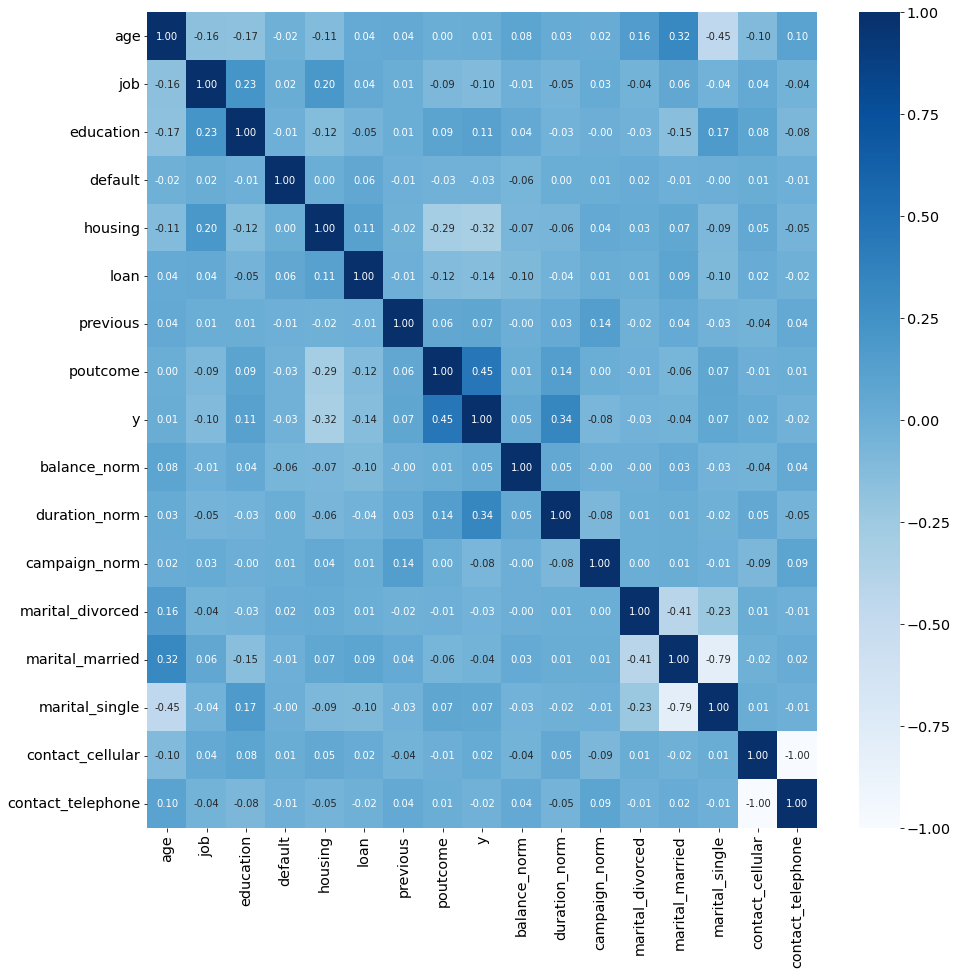

In [60]:
plt.figure(figsize=(15, 15)) # Melihat korelasi menggunakan heatmap
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## 5. CLASS IMBALANCE

0    4175
1    1252
Name: y, dtype: int64


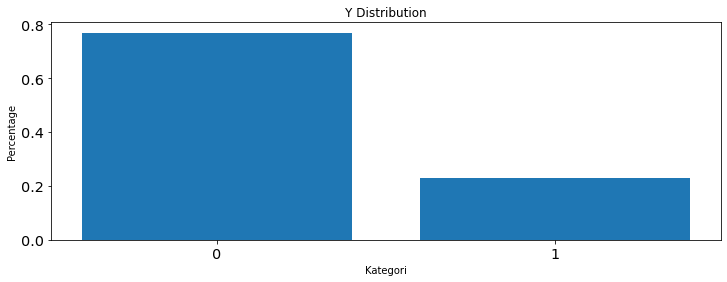

In [61]:
# Melihat distribusi target pada feature 'y' antara users yang subscribe deposit (y atau 1) dan tidak subscribe (n atau 0).
dist_y = df_new['y'].value_counts()
print(dist_y)


plt.bar(dist_y.index.astype(str), dist_y.values/sum(dist_y.values))
plt.title('Y Distribution')
plt.xlabel('Kategori')
plt.ylabel('Percentage')
plt.show()

In [62]:
from imblearn import under_sampling, over_sampling

In [63]:
# pemisahan features vs target
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['y']]]
y = df_new['y'].values
print(X.shape)
print(y.shape)

(5427, 16)
(5427,)


In [64]:
X_undersampling , y_undersampling = under_sampling.RandomUnderSampler().fit_resample(X, y)
X_oversampling , y_oversampling = over_sampling.SMOTE().fit_resample(X,y)

In [65]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_undersampling).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_oversampling).value_counts())

Original
0    4175
1    1252
dtype: int64


UNDERSAMPLING
0    1252
1    1252
dtype: int64


OVERSAMPLING
0    4175
1    4175
dtype: int64


In [66]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
# Separate our features and our target variable
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['y']]]
y = df_new['y'].values

# Split our data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train our dummy classifier and compute accuracy
dummy_clf = DummyClassifier(strategy='constant', constant=0)
dummy_clf.fit(X_train, y_train)
print(accuracy_score(y_test, dummy_clf.predict(X_test)))

# Train our Random Forest classifier and compute accuracy
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print(accuracy_score(y_test, rf_clf.predict(X_test)))

0.7774502579218865
0.8341930729550479


In [68]:
# Metode Precision

# Compute the precision of our models
from sklearn.metrics import precision_score

# Dummy classifier
print(precision_score(y_test, dummy_clf.predict(X_test)))

# Random Forest classifier
print(precision_score(y_test, rf_clf.predict(X_test)))

0.0
0.6696035242290749


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Metode Recall

# Compute the recall of our models
from sklearn.metrics import recall_score

# Dummy classifier
print(recall_score(y_test, dummy_clf.predict(X_test)))

# Random Forest classifier
print(recall_score(y_test, rf_clf.predict(X_test)))

0.0
0.5033112582781457


In [70]:
# Metode F1 Score

# Compute the f1_score of our models
from sklearn.metrics import f1_score

# Dummy classifier
print(f1_score(y_test, dummy_clf.predict(X_test)))

# Random Forest classifier
print(f1_score(y_test, rf_clf.predict(X_test)))

0.0
0.5746691871455576


In [71]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [72]:
# Menggunakan Metode KFold

kf = KFold(n_splits=5,shuffle=True,random_state=42)
mean_f1 = 0
for train_ix, test_ix in kf.split(X, y):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_test)
    mean_f1 += f1_score(y_test, predictions)
    
print(f'Mean F1 Score: {mean_f1 / kf.n_splits}')

Mean F1 Score: 0.6085201138082523
